# Classifying Poisonous Mushrooms using Supervised Learning Algorithms


## Data Description

This dataset can be found on the UCI Machine Learning Repository [link](https://archive.ics.uci.edu/ml/datasets/mushroom)

### Variables: 
classes: edible=e, poisonous=p

cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s

cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s

cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y

bruises: bruises=t,no=f

odor: almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s

gill-attachment: attached=a,descending=d,free=f,notched=n

gill-spacing: close=c,crowded=w,distant=d

gill-size: broad=b,narrow=n

gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y

stalk-shape: enlarging=e,tapering=t

stalk-root: bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=?

stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s

stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s

stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

veil-type: partial=p,universal=u

veil-color: brown=n,orange=o,white=w,yellow=y

ring-number: none=n,one=o,two=t

ring-type: cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z

spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y

population: abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y

habitat: grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
# to calculate the performances of the models 
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score # score evaluation
from sklearn.model_selection import cross_val_predict # prediction
from IPython.display import Markdown as md
from IPython.display import HTML
import math
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from pprint import pprint
import time
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score, precision_score

In [3]:
df = pd.read_csv('mushrooms.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [4]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


Although we have no null values every variable is an object, by using head we can see the values are letters so we have to convert the variables into numeric values using some sort of encoding

In [5]:
#just to ensure that there are really no empty values
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

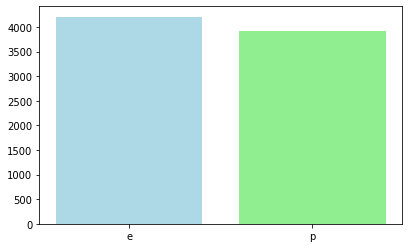

In [6]:
#we are trying to train a model to tell if a mushroom is poisonous or not so we can start by visualiing how many classes
#of those we have in out data

plt.figure(figsize=(6.5, 4))
plt.bar(df['class'].value_counts().index, df['class'].value_counts().values,color=['lightblue','lightgreen'])
plt.show()

In [7]:
df_encoded = df.copy()

Le = LabelEncoder()

# iterating the encoding all the attributes
for features in df.columns:
    df_encoded[features] = Le.fit_transform(df_encoded[features])

df_encoded.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


class: poisonous = 1, edible = 0

Now that all the data is encoded we can do some exploritory analysis.

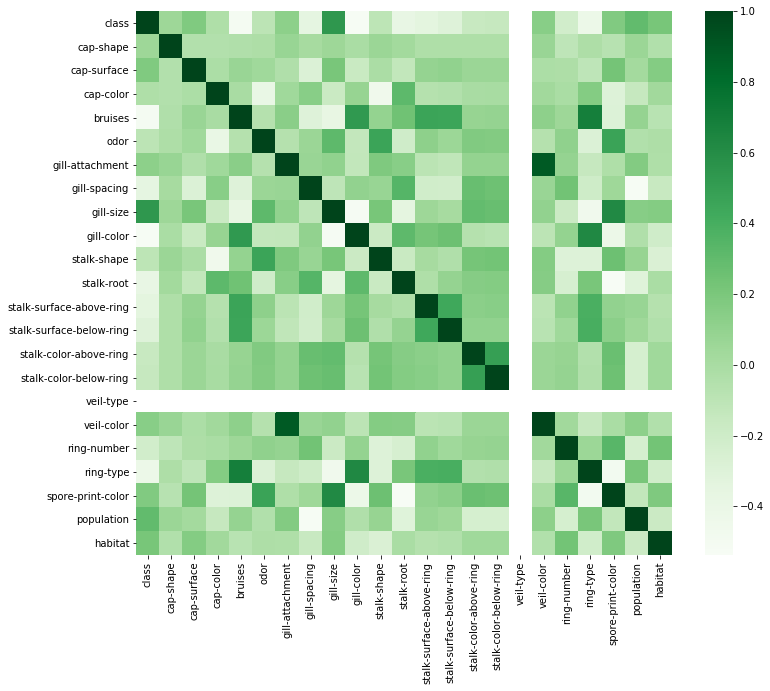

In [8]:


plt.figure(figsize=(12,10))
sns.heatmap(df_encoded.corr(), cmap='Greens')

In [9]:
#we are dropping veil type because it is useless cause it contains the same value for every row

df_encoded.drop(['veil-type'], axis = 1, inplace = True)
df_encoded.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,2,7,7,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,2,7,7,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,2,7,7,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,2,7,7,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,2,7,7,2,1,0,3,0,1


In [10]:
len(df_encoded.columns)

22

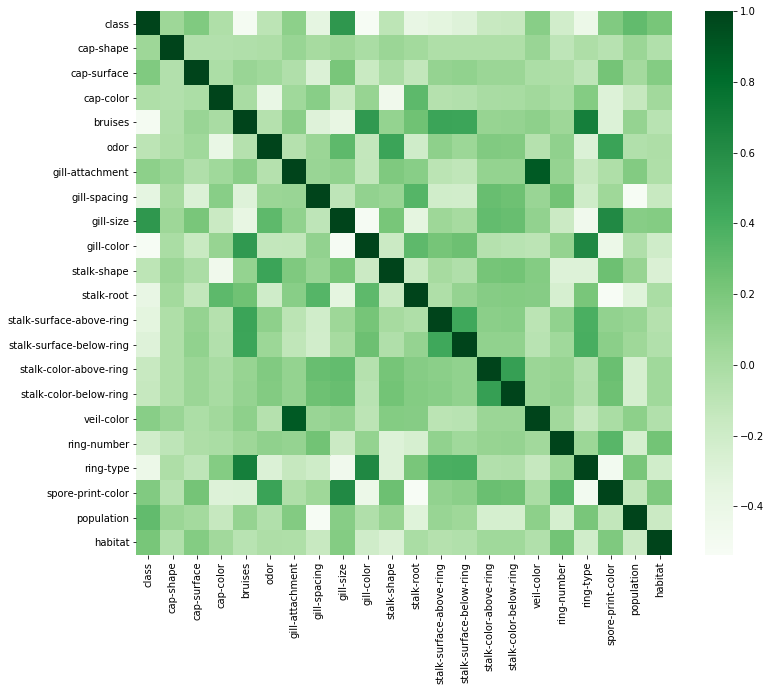

In [11]:

plt.figure(figsize=(12,10))
sns.heatmap(df_encoded.corr(), cmap='Greens')

Now we can create the model to fit our data<br>
First we split our data into training and test set.
We will be using a neural network with a logistic regression function as the activation function and a scocastic gradient descent method
poisonous = 1, edible = 0


## Baseline Implementation

In [12]:

X = df_encoded.drop(columns='class')
X
Y = df_encoded['class']
Y

X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size=0.20)

### Neural Network

In [13]:
clf = MLPClassifier(hidden_layer_sizes=(21,21,21),activation='logistic',early_stopping = True)

In [14]:
clf.fit(X_train,y_train)

MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
              beta_1=0.9, beta_2=0.999, early_stopping=True, epsilon=1e-08,
              hidden_layer_sizes=(21, 21, 21), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [15]:
y_pred = clf.predict(X_test)

In [16]:
print(confusion_matrix(y_test,y_pred))

[[837   5]
 [  3 780]]


(2.5, -0.5)

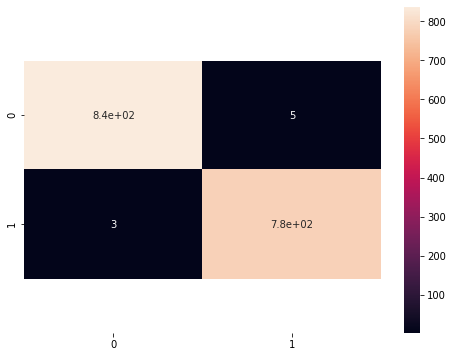

In [17]:

plt.figure(figsize = (8,6))
heatmap = sns.heatmap(confusion_matrix(y_test,y_pred), annot=True)
bottom, top = heatmap.get_ylim()
heatmap.set_ylim(bottom + 0.5, top - 0.5)

The confusion matrix above shows that out of the 1625 rows that were tested it was able to succesfully predict if the mushroom was poisnous or not for 1622 rows. It was unable to predict the correct y values for 3 rows. 

In [18]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       842
           1       0.99      1.00      0.99       783

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



We can view the classification report and see that the f1-score is really good. This indicates our model is very good because the f1-score is the most balanced metric in the classification_report.

In [19]:
print(accuracy_score(y_test,y_pred))

0.9950769230769231


Overall the model is pretty accuarte with an accuracy score of 99.8%.

### Logistic Regression

Logistic regression is for classifying binary variables. Since we are classifying

In [20]:
clf = LogisticRegression(max_iter=3000).fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(clf.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.96


In [21]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96       842
           1       0.97      0.94      0.96       783

    accuracy                           0.96      1625
   macro avg       0.96      0.96      0.96      1625
weighted avg       0.96      0.96      0.96      1625



Text(0.5, 1, 'Confusion Matrix for Logistic Regression')

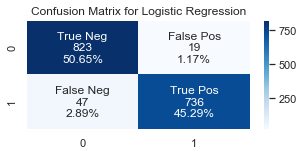

In [22]:
plt.figure(figsize = (5,2))
sns.set(font_scale=1)
cm = confusion_matrix(y_test, y_pred)
group_names = ["True Neg","False Pos","False Neg","True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')
plt.title('Confusion Matrix for Logistic Regression', fontsize = 12) # title with fontsize 20

### Random Forest

In [23]:
rf = RandomForestClassifier(n_estimators = 100)
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [24]:
y_hat = rf.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_hat))

Accuracy: 1.0


In [25]:
print(classification_report(y_test, y_hat))
print("Accuracy:", accuracy_score(y_test, y_hat))
print("Recall:", recall_score(y_test, y_hat))
print("Precision:", precision_score(y_test, y_hat))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       842
           1       1.00      1.00      1.00       783

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

Accuracy: 1.0
Recall: 1.0
Precision: 1.0


In [26]:
conf_matrix = confusion_matrix(y_test, y_hat)
conf_df = pd.DataFrame(conf_matrix, columns=['y_actual','y_predict'])
display(conf_df)

,y_actual,y_predict
0,842,0
1,0,783


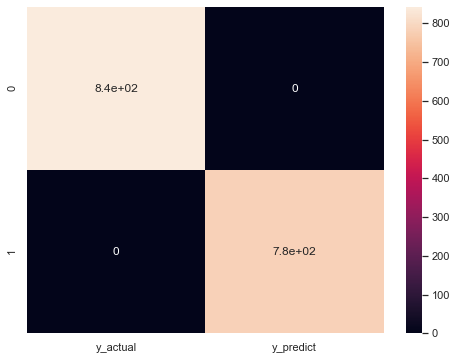

In [27]:
plt.figure(figsize = (8, 6))
ax = sns.heatmap(conf_df, annot = True)
plt.savefig('rndmfrstconf1.png')

In [28]:
#importance of each variable
importances = rf.feature_importances_
imp_df = pd.DataFrame(columns = df_encoded.columns)
imp_df = imp_df.drop(columns = ['class'])
imp_df.loc[len(imp_df)] = importances

display(imp_df)

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,0.003242,0.010575,0.014312,0.032696,0.176544,0.002808,0.044583,0.112111,0.111977,0.019989,...,0.037809,0.044435,0.018711,0.011705,0.002243,0.015764,0.094831,0.09238,0.057813,0.032778


In [29]:
perfromance_model = RandomForestClassifier(n_estimators = 100)
start_time = time.time()
perfromance_model.fit(X_train, y_train)
elapsed_time = time.time() - start_time
print(elapsed_time)

0.41794919967651367


## Implementation with hyperparameter tuning

The accuracy above was achived without regularization, We will perform regularization in an attempt to improve the learning of the model.

In [30]:
scaler = StandardScaler()
# Fit only to the training data
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [31]:
# Now apply the transformations to the data:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

#print(X_train,X_test)

### Neural Network

In [32]:
reg_clf = MLPClassifier(hidden_layer_sizes=(21,21,21),activation='logistic',early_stopping = True,alpha=0.002)

In [33]:
reg_clf.fit(X_train,y_train)

MLPClassifier(activation='logistic', alpha=0.002, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=True, epsilon=1e-08,
              hidden_layer_sizes=(21, 21, 21), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [34]:
reg_y_pred = reg_clf.predict(X_test)

In [35]:
print(confusion_matrix(y_test,reg_y_pred))

[[838   4]
 [ 14 769]]


In [36]:
print(classification_report(y_test,reg_y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       842
           1       0.99      0.98      0.99       783

    accuracy                           0.99      1625
   macro avg       0.99      0.99      0.99      1625
weighted avg       0.99      0.99      0.99      1625



In [37]:
print(accuracy_score(y_test,reg_y_pred))

0.9889230769230769


### Random Forest

In [38]:
new_rf = RandomForestClassifier(n_estimators = 100)
new_rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [39]:
y_hat_p = new_rf.predict(X_test)

In [40]:
display(confusion_matrix(y_test, y_hat_p))

array([[842,   0],
       [  0, 783]])

In [43]:
print(classification_report(y_test, y_hat_p))
print("Accuracy:", accuracy_score(y_test, y_hat_p))
print("Recall:", recall_score(y_test, y_hat_p))
print("Precision:", precision_score(y_test, y_hat_p))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       842
           1       1.00      1.00      1.00       783

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

Accuracy: 1.0
Recall: 1.0
Precision: 1.0
